# Problem Statement #

A stock price always fluctuates, but is there a relation between a closing price and its moving averages?

An analyst want to showcase how the stock would move, he has 5 years of stock price data with him on which he needs to perform the analysis.

Objective: Find the possible futuristic movement of the stock 'GOOG' based on its price for the last 5 years.

Perform the following steps:
1. Get 5 years of data from Finanace package with ticker Symbol 'GOOG'
2. Create 50DMA and 200 DMA
3. Plot it with the actual price
4. Basic EDA on the data
5. Fit statsmodel OLS to find the best possible features

In [3]:
# Import libraries needed for EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read the dataset

df = pd.read_csv('../Datasets/OSL Datasets/Lesson_04/pivot.csv')
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [5]:
df.tail()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
25,2019-09-26,5.50,3.033,2.0,31.0,13.0,0.0,31.0,0.0,5500.0,2426.4,3000.0,18600.0,7150.0,0.0,13950.0,0.0
26,2019-09-27,4.66,4.359,4.0,41.1,4.0,0.0,2.0,4.0,4660.0,3487.2,6000.0,24660.0,2200.0,0.0,900.0,3600.0
27,2019-09-28,7.00,1.680,4.1,48.0,6.2,0.0,1.0,3.0,7000.0,1344.0,6150.0,28800.0,3410.0,0.0,450.0,2700.0
28,2019-09-29,3.51,3.867,3.0,67.8,6.0,0.0,3.0,2.1,3510.0,3093.6,4500.0,40680.0,3300.0,0.0,1350.0,1890.0
29,2019-09-30,2.00,1.439,2.1,49.4,9.0,0.0,5.0,2.0,2000.0,1151.2,3150.0,29640.0,4950.0,0.0,2250.0,1800.0


In [6]:
df.shape

(30, 17)

In [7]:
# Set the date column as index

df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)

df.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [ ]:
# Check for distrubtion and skewness using plots

for col in df.columns:
    sns.displot(df[col])
    plt.show()

In [9]:
# Describe the data

df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000
mean,5.36900,3.714567,3.116667,32.816000,7.593333,0.533333,4.047222,3.636667,5369.000000,2971.653333,4675.000000,19689.60000,4176.333333,5333.333333,1821.250000,3273.000000
std,2.68217,1.962529,1.488191,15.166121,3.941812,1.008014,5.658703,2.282993,2682.170184,1570.022885,2232.286596,9099.67288,2167.996824,10080.138660,2546.416409,2054.693785
min,1.18000,0.373000,1.000000,12.125000,1.000000,0.000000,0.000000,0.000000,1180.000000,298.400000,1500.000000,7275.00000,550.000000,0.000000,0.000000,0.000000
25%,2.83500,2.324500,2.000000,22.000000,5.000000,0.000000,1.000000,2.000000,2835.000000,1859.600000,3000.000000,13200.00000,2750.000000,0.000000,450.000000,1800.000000
50%,5.34000,3.366500,3.000000,27.700000,7.000000,0.000000,2.500000,3.000000,5340.000000,2693.200000,4500.000000,16620.00000,3850.000000,0.000000,1125.000000,2700.000000
75%,7.00750,4.501750,3.862500,43.687500,10.650000,0.750000,5.000000,4.000000,7007.500000,3601.400000,5793.750000,26212.50000,5857.500000,7500.000000,2250.000000,3600.000000
max,10.68000,9.530000,7.000000,67.800000,17.000000,3.000000,31.000000,10.000000,10680.000000,7624.000000,10500.000000,40680.00000,9350.000000,30000.000000,13950.000000,9000.000000


# Inference from the describe function #

1. Most number of units sold were of Drug4
2. Least number of units sold where of Drug6
3. Most sales happend with Drug4 with Drug2 contributed the least
4. Even though Drug6 sold a max of 3 units, it generated 30000 worth revenue. implying that the price of each drug is not same.

In [11]:
import numpy as np

np.mean(df['Drug1_Sales']/df['Drug1'])

1000.0

In [13]:
drugs = ['Drug'+str(x) for x in range(1, 9)]
for drug in drugs:
    print(drug, end=' - ')
    print(np.mean(df[drug + '_Sales']/df[drug]))

Drug1 - 1000.0
Drug2 - 800.0
Drug3 - 1500.0
Drug4 - 600.0
Drug5 - 550.0
Drug6 - 10000.0
Drug7 - 450.0
Drug8 - 900.0


### Inference of drug price:

1. No price fluctation between weeks.
2. All drugs have different price.
3. Confirms our speculation that Drug6 is constly than the others.
4. Drug6 is the costilest while Drug5 is the cheapest.

# Weekly Analysis #


In [14]:
wdf = df.resample('W').mean()
wdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.000000,4.360000,5.000000,17.000000,8.200000,1.000000,5.000000,4.000000,2000.000000,3488.000000,7500.000000,10200.000000,4510.000000,10000.000000,2250.000000,3600.000000
2019-09-08,5.815714,3.823857,2.250000,22.107857,7.285714,0.857143,2.142857,4.071429,5815.714286,3059.085714,3375.000000,13264.714286,4007.142857,8571.428571,964.285714,3664.285714
2019-09-15,5.072857,4.425286,2.807143,25.482143,9.600000,0.714286,4.285714,4.357143,5072.857143,3540.228571,4210.714286,15289.285714,5280.000000,7142.857143,1928.571429,3921.428571
2019-09-22,6.691429,3.628000,3.485714,35.464286,4.457143,0.428571,3.714286,3.000000,6691.428571,2902.400000,5228.571429,21278.571429,2451.428571,4285.714286,1671.428571,2700.000000
2019-09-29,4.858571,3.214000,3.800000,48.100000,8.742857,0.142857,5.773810,3.300000,4858.571429,2571.200000,5700.000000,28860.000000,4808.571429,1428.571429,2598.214286,2970.000000


In [16]:
wdf.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.406429,3.481690,3.240476,32.925714,7.880952,0.523810,4.319444,3.454762,4406.428571,2785.352381,4860.714286,19755.428571,4334.523810,5238.095238,1943.750000,3109.285714
std,1.971683,1.099502,1.089829,13.668698,1.850883,0.400680,1.276431,0.876236,1971.682955,879.601850,1634.743942,8201.218891,1017.985773,4006.796946,574.393813,788.612188
min,2.000000,1.439000,2.100000,17.000000,4.457143,0.000000,2.142857,2.000000,2000.000000,1151.200000,3150.000000,10200.000000,2451.428571,0.000000,964.285714,1800.000000
25%,2.714643,3.317500,2.389286,22.951429,7.514286,0.214286,3.857143,3.075000,2714.642857,2654.000000,3583.928571,13770.857143,4132.857143,2142.857143,1735.714286,2767.500000
50%,4.965714,3.725929,3.146429,30.473214,8.471429,0.571429,4.642857,3.650000,4965.714286,2980.742857,4719.642857,18283.928571,4659.285714,5714.285714,2089.285714,3285.000000
75%,5.630000,4.225964,3.721429,44.941071,8.935714,0.821429,5.000000,4.053571,5630.000000,3380.771429,5582.142857,26964.642857,4914.642857,8214.285714,2250.000000,3648.214286
max,6.691429,4.425286,5.000000,49.400000,9.600000,1.000000,5.773810,4.357143,6691.428571,3540.228571,7500.000000,29640.000000,5280.000000,10000.000000,2598.214286,3921.428571


### Inference from the describe function of weekly analysis #
1. Drug4 tops the sales
2. Drug6 sold the least units
3. Drug7 performed the worst in terms of sales even if it sold to 6 units

<BarContainer object of 6 artists>

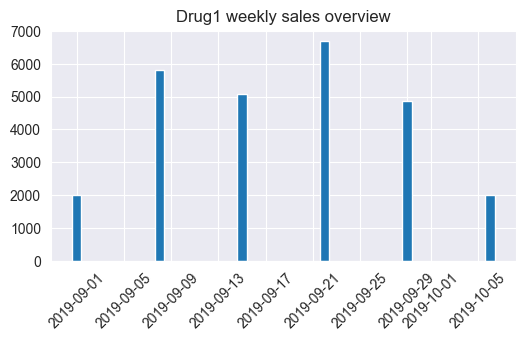

In [20]:
# Drug1 weekly sales overview
plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug1 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug1_Sales)

# Inference of Drug1 weekly sales #

1. Best week was from 17/09 to 21/09.
2. Sales picked up gradually with hiccups, topped at 21/09 and then saw decline.
3. First week and last week of september make almost of same sales.


<BarContainer object of 6 artists>

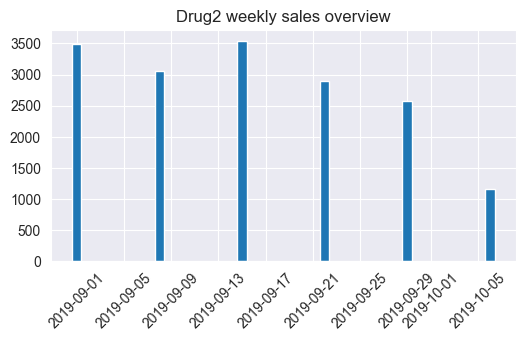

In [21]:
# Drug2 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug2 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug2_Sales)

<BarContainer object of 6 artists>

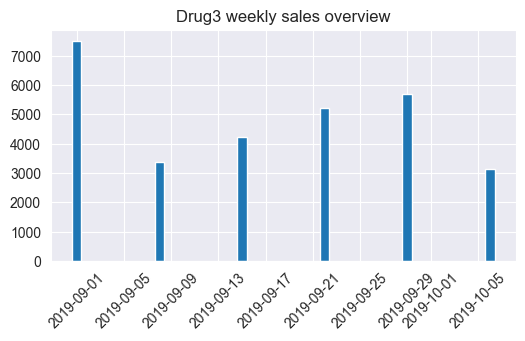

In [22]:
# Drug3 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug3 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug3_Sales)

<BarContainer object of 6 artists>

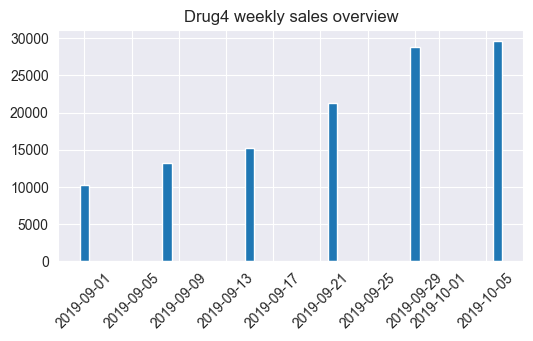

In [23]:
# Drug4 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug4 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug4_Sales)

<BarContainer object of 6 artists>

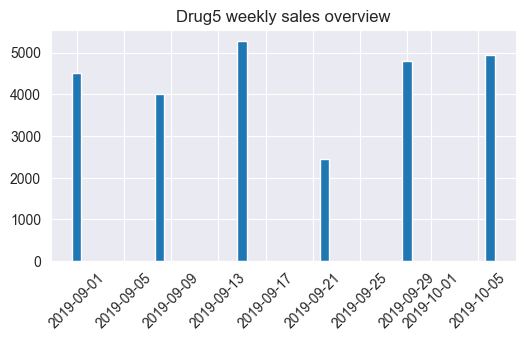

In [24]:
# Drug5 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug5 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug5_Sales)

<BarContainer object of 6 artists>

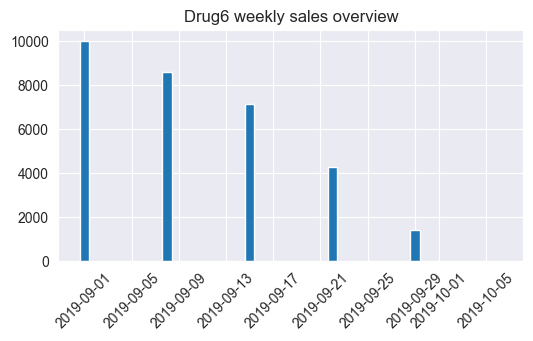

In [25]:
# Drug6 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug6 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug6_Sales)

<BarContainer object of 6 artists>

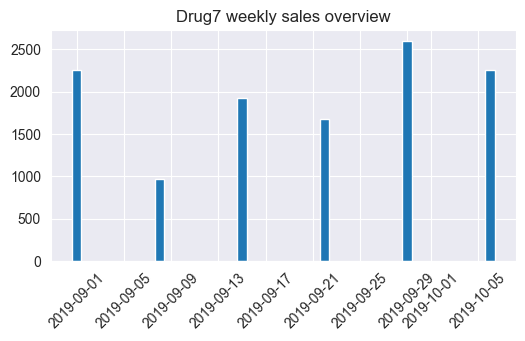

In [26]:
# Drug7 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug7 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug7_Sales)

<BarContainer object of 6 artists>

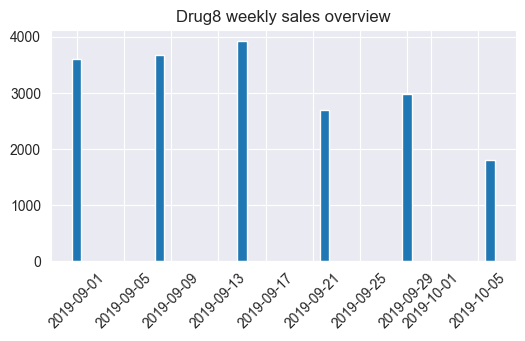

In [27]:
# Drug8 weekly sales overview

plt.figure(figsize=(6, 3), dpi=100)
plt.tick_params(axis='x', rotation=45)
plt.title('Drug8 weekly sales overview')
plt.bar(x=wdf.index, height=wdf.Drug8_Sales)

# Montly Analysis #

In [29]:
mdf = df.resample('M').mean()
mdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-30,5.369,3.714567,3.116667,32.816,7.593333,0.533333,4.047222,3.636667,5369.0,2971.653333,4675.0,19689.6,4176.333333,5333.333333,1821.25,3273.0
